In [1]:
from money_model import MoneyModel
import seaborn as sns
import numpy as np
import mesa
import pandas as pd
import copy
import matplotlib.pyplot as plt

# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

In [2]:
model = MoneyModel(100, 10, 10)
for i in range(100):
    model.step()

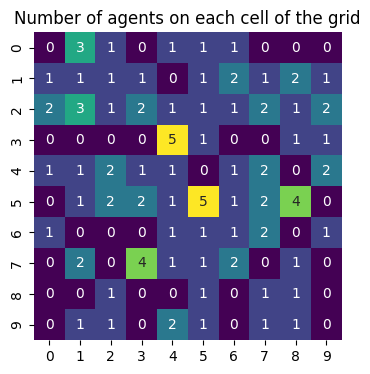

In [3]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");

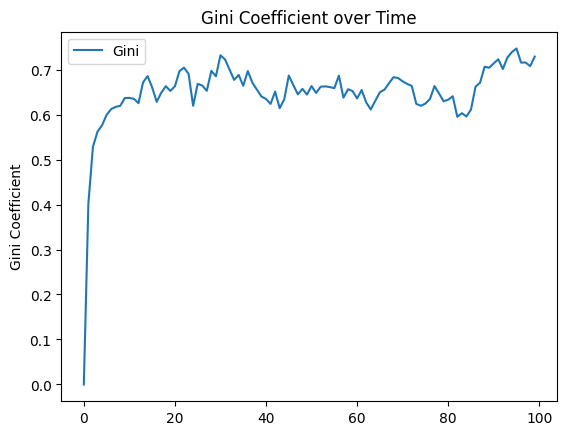

In [4]:
gini = model.datacollector.get_model_vars_dataframe()
# Plot the Gini coefficient over time
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");

In [5]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

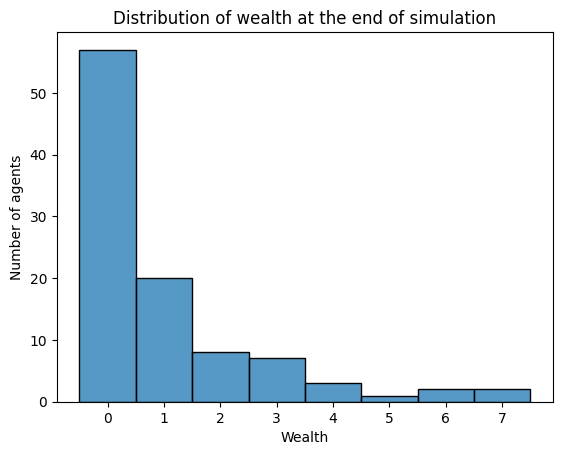

In [6]:
last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"]
# Create a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete=True)
g.set(
    title="Distribution of wealth at the end of simulation",
    xlabel="Wealth",
    ylabel="Number of agents",
);

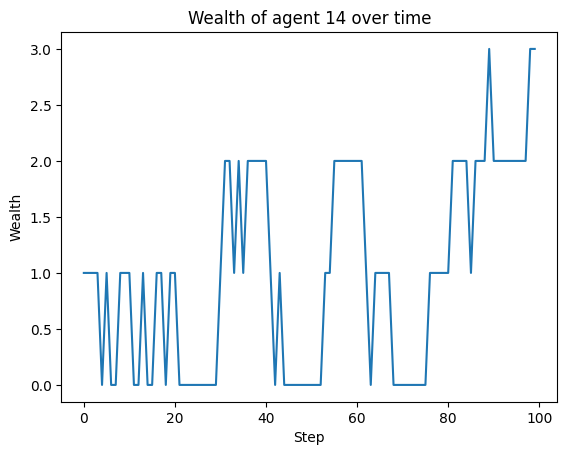

In [7]:
# Get the wealth of agent 14 over time
one_agent_wealth = agent_wealth.xs(14, level="AgentID")

# Plot the wealth of agent 14 over time
g = sns.lineplot(data=one_agent_wealth, x="Step", y="Wealth")
g.set(title="Wealth of agent 14 over time");

In [8]:
# save the model data (stored in the pandas gini object) to CSV
gini.to_csv("model_data.csv")

# save the agent data (stored in the pandas agent_wealth object) to CSV
agent_wealth.to_csv("agent_data.csv")

In [9]:
params = {"width": 10, "height": 10, "N": range(10, 500, 10)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=50,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

  0%|          | 0/245 [00:00<?, ?it/s]

In [10]:
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


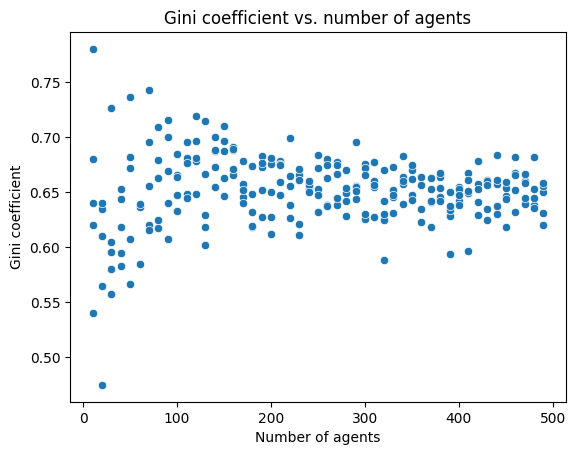

In [11]:
# Filter the results to only contain the data of one agent (the Gini coefficient will be the same for the entire population at any time) at the 100th step of each episode
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 50)]
results_filtered[["iteration", "N", "Gini"]].reset_index(
    drop=True
).head()  # Create a scatter plot
g = sns.scatterplot(data=results_filtered, x="N", y="Gini")
g.set(
    xlabel="Number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs. number of agents",
);

In [12]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]
# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=25
    )
)
# For a prettier display we can also convert the data frame to html, uncomment to test in a Jupyter Notebook
# from IPython.display import display, HTML
# display(HTML(one_episode_wealth.to_html(index=False, columns=['Step', 'AgentID', 'Wealth'], max_rows=25)))

 Step  AgentID  Wealth
    0        0       1
    0        1       1
    0        2       1
    0        3       1
    0        4       1
    0        5       1
    0        6       1
    0        7       1
    0        8       1
    0        9       1
    1        0       1
    1        1       1
  ...      ...     ...
   49        8       0
   49        9       0
   50        0       0
   50        1       0
   50        2       0
   50        3       4
   50        4       1
   50        5       0
   50        6       0
   50        7       5
   50        8       0
   50        9       0


In [13]:
results_one_episode = results_df[
    (results_df.N == 10) & (results_df.iteration == 1) & (results_df.AgentID == 0)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=25))

 Step  Gini
    0  0.00
    1  0.18
    2  0.32
    3  0.32
    4  0.32
    5  0.32
    6  0.32
    7  0.32
    8  0.32
    9  0.32
   10  0.46
   11  0.46
  ...   ...
   39  0.48
   40  0.48
   41  0.48
   42  0.48
   43  0.54
   44  0.54
   45  0.54
   46  0.54
   47  0.62
   48  0.62
   49  0.62
   50  0.62


In [14]:
%pip install --quiet mesa
import mesa

# You can either define the BoltzmannWealthModel (aka MoneyModel) or install mesa-models:
%pip install --quiet -U git+https://github.com/projectmesa/mesa-examples#egg=mesa-models

from mesa_models.boltzmann_wealth_model.model import BoltzmannWealthModel

def agent_portrayal(agent):
    return {
        "color": "tab:blue",
        "size": 50,
    }
model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

from mesa.experimental import JupyterViz

page = JupyterViz(
    BoltzmannWealthModel,
    model_params,
    measures=["Gini"],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)
# This is required to render the visualization in the Jupyter notebook
page

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\alchimia-0.8.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\flask-1.1.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\flask_bootstrap-3.3.7.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\flask_login-0.4.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\flask_migrate-2.5.2-py3.11

Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

Cannot show ipywidgets in text

In [15]:
from matplotlib.figure import Figure
import solara

def make_histogram(model):
    # Note: you must initialize a figure using this method instead of
    # plt.figure(), for thread safety purpose
    fig = Figure()
    ax = fig.subplots()
    wealth_vals = [agent.wealth for agent in model.schedule.agents]
    # Note: you have to use Matplotlib's OOP API instead of plt.hist
    # because plt.hist is not thread-safe.
    ax.hist(wealth_vals, bins=10)
    
    solara.FigureMatplotlib(fig)

page = JupyterViz(
    BoltzmannWealthModel,
    model_params,
    measures=["Gini", make_histogram],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)
# This is required to render the visualization in the Jupyter notebook
page

Cannot show ipywidgets in text